In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import json
import argparse
import cv2
import os

In [ ]:
home_path = os.path.dirname(os.getcwd())
imgs_path = os.path.join(home_path, 'images')


/images


In [ ]:
def process_image(image):
    """
    Input:
    @image = Image to be processed in the form of a numpy array
    Return:
    @image = Image in the form of a numpy array with shape (224, 224, 3)
    """
    # 1. Convert to a TensorFlow tensor
    image_tf = tf.convert_to_tensor(image)
    # 2. Resize image with tf.image.resize
    image_resized = tf.image.resize(image_tf, [224, 224])
    # 3. Normalize: Divide pixel values by 255 to get floats in range [0, 1]
    image_resized /= 255
    # 4. Convert back to Numpy using .numpy()
    image_np = image_resized.numpy()
    return image_np

# predict
def predict(image_path, top_k=1):
    """
    Input:
    @image = Image to be classified
    @model = Model that will predict the output
    @top_k = The first top_k numbers of predicted classes
    Return:
    @probs(list) = The probabilities of the top_k predictions
    @classes(list) = The classes corresponding to the top_k predictions
    """
    classes = ['Animal', 'Person']

    # 0. Load model
    keras_model = os.path.join('ObjectDetected.h5')
    model = tf.keras.models.load_model(keras_model,
                                       custom_objects = {
                                           'KerasLayer': hub.KerasLayer},
                                       compile=False)
    # 1. Load image given image_path using Image.open()
    image = Image.open(image_path)
    # 2. Convert image to numpy array np.asarray()
    image_np = np.asarray(image)
    # 3. process_image()
    image_processed = process_image(image_np)
    # 4. np.expand_dims() to add the extra dimension (1, 224, 224, 3)
    image = np.expand_dims(image_processed, axis = 0)
    # 5. Pass image to model
    predictions = model.predict(image)

    pred_list = list(predictions[0])
    max_pred = max(pred_list)
    predict_index = pred_list.index(max_pred)
    name = classes[predict_index]
    return name, max_pred*100

In [ ]:


class_name, accuracy = predict(('images/img11.jpg'))

print(f"Class: {class_name}")
print(f"Accuracy: {accuracy}%")

1/1 [==============================] - 1s 507ms/step
Class: Animal
Accuracy: 90.09079337120056%


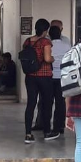

1/1 [==============================] - 1s 886ms/step
Class: Person
Accuracy: 99.92997646331787%


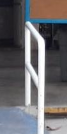

1/1 [==============================] - 1s 545ms/step
Class: Animal
Accuracy: 98.6522376537323%


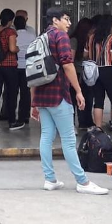

1/1 [==============================] - 1s 547ms/step
Class: Person
Accuracy: 99.78134632110596%


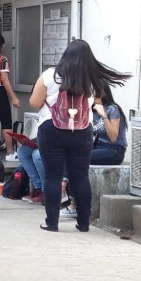

1/1 [==============================] - 1s 572ms/step
Class: Person
Accuracy: 99.94089603424072%


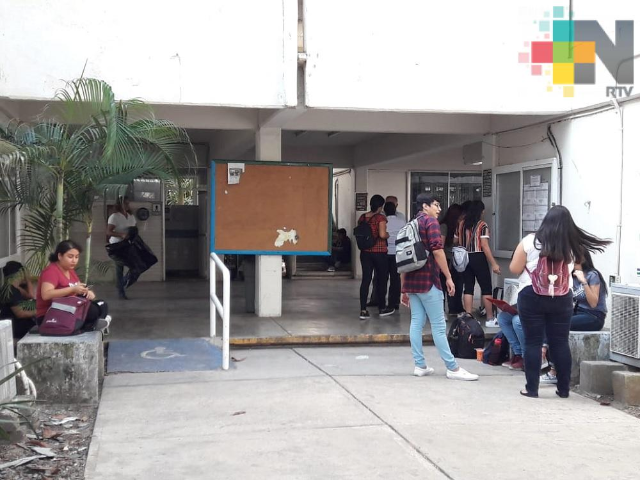

Cantidad de Personas en la imagen: 3


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import json
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow
i = 0
def process_image(image):
    """
    Input:
    @image = Image to be processed in the form of a numpy array
    Return:
    @image = Image in the form of a numpy array with shape (224, 224, 3)
    """
    # 1. Convert to a TensorFlow tensor
    image_tf = tf.convert_to_tensor(image)
    # 2. Resize image with tf.image.resize
    image_resized = tf.image.resize(image_tf, [224, 224])
    # 3. Normalize: Divide pixel values by 255 to get floats in range [0, 1]
    image_resized /= 255
    # 4. Convert back to Numpy using .numpy()
    image_np = image_resized.numpy()
    return image_np

# predict
def predict(img, top_k=1):
    """
    Input:
    @image = Image to be classified
    @model = Model that will predict the output
    @top_k = The first top_k numbers of predicted classes
    Return:
    @probs(list) = The probabilities of the top_k predictions
    @classes(list) = The classes corresponding to the top_k predictions
    """
    classes = ['Animal', 'Person']

    # 0. Load model
    keras_model = os.path.join('ObjectDetected.h5')
    model = tf.keras.models.load_model(keras_model,
                                       custom_objects = {
                                           'KerasLayer': hub.KerasLayer},
                                       compile=False)
    # 2. Convert image to numpy array np.asarray()
    image_np = np.asarray(img)
    # 3. process_image()
    image_processed = process_image(image_np)
    # 4. np.expand_dims() to add the extra dimension (1, 224, 224, 3)
    image = np.expand_dims(image_processed, axis = 0)
    # 5. Pass image to model
    predictions = model.predict(image)

    pred_list = list(predictions[0])
    max_pred = max(pred_list)
    predict_index = pred_list.index(max_pred)
    name = classes[predict_index]
    return name, max_pred*100

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cv2.startWindowThread()

cap = cv2.imread('img.jpg')

frame = cv2.resize(cap, (640, 480))
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
    newImage = frame[yA:yB, xA:xB]
    #PRUEBA
    cv2_imshow(newImage)
    class_name, accuracy = predict(newImage)
    print(f"Class: {class_name}")
    print(f"Accuracy: {accuracy}%")
    if class_name == 'Person':
      i+= 1
cv2_imshow(frame)
print(f'Cantidad de Personas detectadas en la imagen: {i}')

if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()
    cv2.waitKey(1)